## About Grad-CAM Heatmap

Grad-CAM is a CNN model explanation technique which helps in visualizing the regions of the image where the CNN model is looking at for classification.

In this technique, gradients flows through the last convolution layer to produce a **coarse localization map** highlighting the important regions in the image for predicting the concept.

It is based on the research paper **"[Grad-CAM: Visual Explanations from Deep Networks via Gradient-based Localization](https://arxiv.org/abs/1610.02391)"**

In [44]:
import pandas as pd
#math operations
import numpy as np
#machine learning
import cv2
import os
from tqdm import tqdm
import random
#for opening and loading image
from PIL import Image
#for preprocessing
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
#Doing One hot encoding as classifier has multiple classes
from random import shuffle
#MobileNetV2 model
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras import Model, layers
from numpy import loadtxt
from tensorflow.keras.applications.imagenet_utils import preprocess_input, decode_predictions
from tensorflow.keras.models import load_model

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import tensorflow as tf

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading Model

In [46]:
model = load_model('/content/drive/MyDrive/Version 8/Thesis_Demo_Simulation_6(With 8 Class) Best Result.h5')

In [47]:
img1 = "/content/drive/MyDrive/Dataset_V_6/test/Apple___healthy/04d4f065-5cb8-4122-b479-d1362d007276___RS_HL 7719.JPG"
img2 = "/content/drive/MyDrive/Dataset_V_6/test/Apple___Apple_scab/augmented_663ad178-6346-4b89-8074-6655f1be1578___FREC_Scab 3500_0_7445.jpg"
img3 = "/content/drive/MyDrive/Dataset_V_6/test/Apple___Black_rot/e9df76bc-d175-42c9-990e-6e6c5f5ac5ce___JR_FrgE.S 8663.JPG"
img4 = "/content/drive/MyDrive/Dataset_V_6/test/Apple___Cedar_apple_rust/112cfc79-00ab-4920-a235-977c134bdb5d___FREC_C.Rust 4365.JPG"
img5 = "/content/drive/MyDrive/Dataset_V_6/test/Corn_(maize)___healthy/0305800e-de91-4742-b923-f9a1c0799392___R.S_HL 8116 copy.jpg"
img6 = "/content/drive/MyDrive/Dataset_V_6/test/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot/c826221e-a999-4509-a7ed-d62726ca6078___RS_GLSp 4332.JPG"
img7 = "/content/drive/MyDrive/Dataset_V_6/test/Corn_(maize)___Common_rust_/RS_Rust 1577.JPG"
img8 = "/content/drive/MyDrive/Dataset_V_6/test/Corn_(maize)___Northern_Leaf_Blight/143ff440-2efd-4bc9-8312-265363c0872f___RS_NLB 3625.JPG"

In [48]:
img_path='/content/drive/MyDrive/Dataset_V_6/test/Apple___Apple_scab/0d3c0790-7833-470b-ac6e-94d0a3bf3e7c___FREC_Scab 2959.JPG'
img = Image.open(img_path).resize((256,256)) #target_size must agree with what the trained model expects!!

# Preprocessing the image
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img.astype('float32')/255

In [49]:
class_dict ={0:"Apple___Apple_scab",
             1:"Apple___Black_rot",
             2:"Apple___Cedar_apple_rust",
             3:"Apple___healthy",
             4:"Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot",
             5:"Corn_(maize)___Common_rust_",
             6:"Corn_(maize)___Northern_Leaf_Blight",
             7:"Corn_(maize)___healthy",
             8:"Grape___Black_rot",
             9:"Grape___Esca_(Black_Measles)",
             10:"Grape___Leaf_blight_(Isariopsis_Leaf_Spot)",
             11:"Grape___healthy",
             12:"Potato___Early_blight",
             13:"Potato___Late_blight",
             14:"Potato___healthy",
             15:"Tomato___Bacterial_spot",
             16:"Tomato___Early_blight",
             17:"Tomato___Late_blight",
             18:"Tomato___Leaf_Mold",
             19:"Tomato___Septoria_leaf_spot",
             20:"Tomato___Spider_mites Two-spotted_spider_mite",
             21:"Tomato___Target_Spot",
             22:"Tomato___Tomato_Yellow_Leaf_Curl_Virus",
             23:"Tomato___Tomato_mosaic_virus",
             24:"Tomato___healthy"}

# ***Prediction***

In [50]:
def pred_image(img_path,model):
  img = Image.open(img_path).resize((256,256)) #target_size must agree with what the trained model expects!!
  # Preprocessing the image
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = img.astype('float32')/255

  preds = model.predict(img)[0]
  prediction = sorted(
      [(class_dict[i], round(j*100, 2)) for i, j in enumerate(preds)],
      reverse=True,
      key=lambda x: x[1]
  )

  return prediction

In [51]:
pred_image(img1,model)

1/1 [==============================] - 0s 200ms/step


[('Apple___healthy', 99.64),
 ('Apple___Apple_scab', 0.17),
 ('Apple___Black_rot', 0.17),
 ('Corn_(maize)___Northern_Leaf_Blight', 0.02),
 ('Corn_(maize)___healthy', 0.01),
 ('Apple___Cedar_apple_rust', 0.0),
 ('Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 0.0),
 ('Corn_(maize)___Common_rust_', 0.0)]

In [52]:
pred_image(img2,model)

1/1 [==============================] - 0s 100ms/step


[('Apple___Apple_scab', 98.78),
 ('Apple___Black_rot', 1.03),
 ('Apple___healthy', 0.19),
 ('Apple___Cedar_apple_rust', 0.0),
 ('Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 0.0),
 ('Corn_(maize)___Common_rust_', 0.0),
 ('Corn_(maize)___Northern_Leaf_Blight', 0.0),
 ('Corn_(maize)___healthy', 0.0)]

In [53]:
pred_image(img3,model)

1/1 [==============================] - 0s 57ms/step


[('Apple___Black_rot', 99.35),
 ('Apple___healthy', 0.62),
 ('Apple___Apple_scab', 0.02),
 ('Apple___Cedar_apple_rust', 0.0),
 ('Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 0.0),
 ('Corn_(maize)___Common_rust_', 0.0),
 ('Corn_(maize)___Northern_Leaf_Blight', 0.0),
 ('Corn_(maize)___healthy', 0.0)]

In [54]:
pred_image(img4,model)

1/1 [==============================] - 0s 65ms/step


[('Apple___Cedar_apple_rust', 100.0),
 ('Apple___Apple_scab', 0.0),
 ('Apple___Black_rot', 0.0),
 ('Apple___healthy', 0.0),
 ('Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 0.0),
 ('Corn_(maize)___Common_rust_', 0.0),
 ('Corn_(maize)___Northern_Leaf_Blight', 0.0),
 ('Corn_(maize)___healthy', 0.0)]

In [55]:
pred_image(img5,model)

1/1 [==============================] - 0s 63ms/step


[('Corn_(maize)___healthy', 100.0),
 ('Apple___Apple_scab', 0.0),
 ('Apple___Black_rot', 0.0),
 ('Apple___Cedar_apple_rust', 0.0),
 ('Apple___healthy', 0.0),
 ('Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 0.0),
 ('Corn_(maize)___Common_rust_', 0.0),
 ('Corn_(maize)___Northern_Leaf_Blight', 0.0)]

In [56]:
pred_image(img6,model)

1/1 [==============================] - 0s 68ms/step


[('Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 96.66),
 ('Corn_(maize)___Northern_Leaf_Blight', 3.34),
 ('Apple___Apple_scab', 0.0),
 ('Apple___Black_rot', 0.0),
 ('Apple___Cedar_apple_rust', 0.0),
 ('Apple___healthy', 0.0),
 ('Corn_(maize)___Common_rust_', 0.0),
 ('Corn_(maize)___healthy', 0.0)]

In [57]:
pred_image(img7,model)

1/1 [==============================] - 0s 77ms/step


[('Corn_(maize)___Common_rust_', 100.0),
 ('Apple___Apple_scab', 0.0),
 ('Apple___Black_rot', 0.0),
 ('Apple___Cedar_apple_rust', 0.0),
 ('Apple___healthy', 0.0),
 ('Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 0.0),
 ('Corn_(maize)___Northern_Leaf_Blight', 0.0),
 ('Corn_(maize)___healthy', 0.0)]

In [58]:
pred_image(img8,model)

1/1 [==============================] - 0s 60ms/step


[('Corn_(maize)___Northern_Leaf_Blight', 97.13),
 ('Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 2.85),
 ('Corn_(maize)___Common_rust_', 0.02),
 ('Apple___Apple_scab', 0.0),
 ('Apple___Black_rot', 0.0),
 ('Apple___Cedar_apple_rust', 0.0),
 ('Apple___healthy', 0.0),
 ('Corn_(maize)___healthy', 0.0)]

In [59]:
import tensorflow as tf
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = tf.keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [60]:
# Prepare image
img_size=(256,256)

img = Image.open(img4).resize((256,256)) #target_size must agree with what the trained model expects!!

# Preprocessing the image
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img.astype('float32')/255

# Remove last layer's softmax
model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img)

1/1 [==============================] - 0s 89ms/step


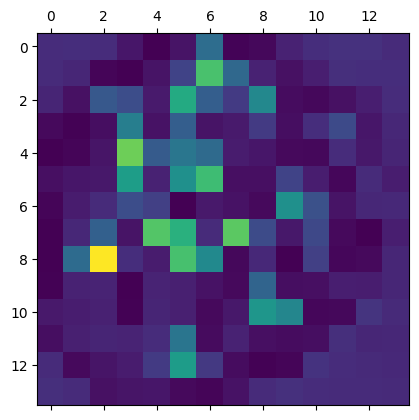

In [61]:
# Generate class activation heatmap
last_conv_layer_name = "max_pooling2d_3"
heatmap = make_gradcam_heatmap(img, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

In [62]:
def generate_heatmap(img_path,last_conv_layer_name):
  # Prepare image
  img_size=(256,256)

  img = Image.open(img_path).resize((256,256)) #target_size must agree with what the trained model expects!!

  # Preprocessing the image
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = img.astype('float32')/255

  # Remove last layer's softmax
  model.layers[-1].activation = None
  heatmap = make_gradcam_heatmap(img, model, last_conv_layer_name)

  return heatmap


In [63]:
heatmap =generate_heatmap(img4,"max_pooling2d_3")

In [64]:
from IPython.display import Image as imgdisp, display
def save_and_display_gradcam(img_path, heatmap, cam_path="/content/heatmap2.jpg", alpha=0.4):
    # Load the original image
    img = tf.keras.preprocessing.image.load_img(img_path)
    img = tf.keras.preprocessing.image.img_to_array(img)


    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(imgdisp(cam_path))



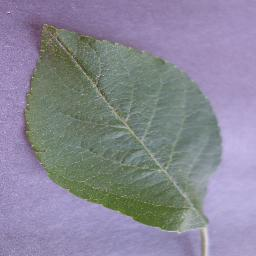

In [65]:
display(imgdisp(img1))

<ipython-input-64-cfc54d2f12bb>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


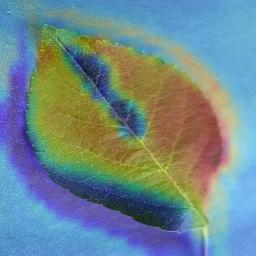

In [66]:
heatmap =generate_heatmap(img1,"conv2d_3")
save_and_display_gradcam(img1, heatmap)

# ***Visulization Ploting***

In [67]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from matplotlib import cm
from PIL import Image

In [71]:
def plot_images_with_heatmaps_and_save(image_paths, model, last_conv_layer_name, save_path):
    plt.figure(figsize=(10, 10))

    for i, img_path in enumerate(image_paths):
        original_img = Image.open(img_path).resize((256, 256))
        heatmap = generate_heatmap(img_path, model, last_conv_layer_name)
        heatmap_img = save_and_display_gradcam(img_path, heatmap, cam_path=f"heatmap_{i}.jpg")

        fig, ax = plt.subplots(1, 2, figsize=(10, 5))

        ax[0].imshow(original_img)
        ax[0].set_title(f"Original Image {i+1}")
        ax[0].set_xlim([0, 256])
        ax[0].set_ylim([256, 0])
        ax[0].set_xlabel('Width')
        ax[0].set_ylabel('Height')

        ax[1].imshow(heatmap_img)
        ax[1].set_title(f"Heatmap Image {i+1}")
        ax[1].set_xlim([0, 256])
        ax[1].set_ylim([256, 0])
        ax[1].set_xlabel('Width')
        ax[1].set_ylabel('Height')

        plt.tight_layout()
        plt.savefig(f"{save_path}/heatmap_{i}.png")  # Save the figure
        plt.close()  # Close the figure to prevent displaying it

    print(f"Images saved to {save_path}")

# Example usage with 3 images
image_paths = ['/content/drive/MyDrive/Dataset_V_6/test/Apple___healthy/04d4f065-5cb8-4122-b479-d1362d007276___RS_HL 7719.JPG', '/content/drive/MyDrive/Dataset_V_6/test/Apple___Apple_scab/augmented_663ad178-6346-4b89-8074-6655f1be1578___FREC_Scab 3500_0_7445.jpg', '/content/drive/MyDrive/Dataset_V_6/test/Apple___Black_rot/e9df76bc-d175-42c9-990e-6e6c5f5ac5ce___JR_FrgE.S 8663.JPG', '/content/drive/MyDrive/Dataset_V_6/test/Apple___Cedar_apple_rust/112cfc79-00ab-4920-a235-977c134bdb5d___FREC_C.Rust 4365.JPG', '/content/drive/MyDrive/Dataset_V_6/test/Corn_(maize)___healthy/0305800e-de91-4742-b923-f9a1c0799392___R.S_HL 8116 copy.jpg', '/content/drive/MyDrive/Dataset_V_6/test/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot/c826221e-a999-4509-a7ed-d62726ca6078___RS_GLSp 4332.JPG', '/content/drive/MyDrive/Dataset_V_6/test/Corn_(maize)___Common_rust_/RS_Rust 1577.JPG', '/content/drive/MyDrive/Dataset_V_6/test/Corn_(maize)___Northern_Leaf_Blight/143ff440-2efd-4bc9-8312-265363c0872f___RS_NLB 3625.JPG' ]
last_conv_layer_name = "max_pooling2d_3"  # replace with your model's last conv layer name
save_path = "/content/drive/MyDrive/saved models"  # specify the path where you want to save the images

plot_images_with_heatmaps_and_save(image_paths, model, last_conv_layer_name, save_path)


<ipython-input-70-f91548e0ea58>:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


Images saved to /content/drive/MyDrive/saved models


<Figure size 1000x1000 with 0 Axes>